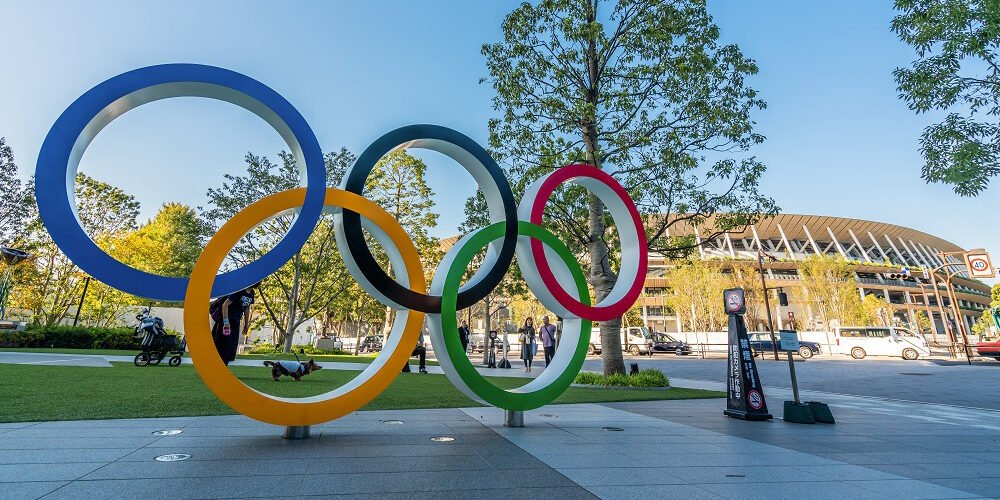

In [2]:
from IPython.display import Image
Image(filename='/content/Tokyo-Olympics.jpeg-1000x500.jpg')

# INTRODUCTION


Doing analsis on the Olympix data of country's with gold, silver, bronze, and total medal won by each country. 

## Data Description

| Variables | Explanation of variable |
| :----- | :----- |
|**name**| name of the player |
|**age**| age of the player |
|**country**| participated country player |
|**year**| olympix game of 2002 to 2012  |
|**Date_Given**| it is the date when game was played |
|**sports**| all game names |
|**gold_medal**| gold medal won by country   |
|**silver_medal**| silver medal won by country |
|**brone_medal**| bronze medal won by country |
|**total_medal**| total medal won by country |

In [6]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

## Please do the basic exploration of the data.

In [7]:
# loading data
olympix = pd.read_csv("olympix_data_organized_with_header (1) (1).csv")

In [8]:
olympix.head()        # head of the table

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


In [9]:
olympix.tail()    # tail of the table

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10-01-2000,Archery,0,0,1,1


In [10]:
olympix.info()      # checking the dtype of all column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


In [11]:
olympix.describe(include="all")    # checking all the column min, max, count, top and all

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
count,8613,8613.000000,8618,8618.000000,8618,8618,8618.000000,8618.000000,8618.000000,8618.000000
unique,6955,NaN,110,NaN,7,49,NaN,NaN,NaN,NaN
top,Matt Wells,NaN,United States,NaN,8/24/2008,Athletics,NaN,NaN,NaN,NaN
freq,4,NaN,1109,NaN,1872,687,NaN,NaN,NaN,NaN
mean,NaN,26.405434,NaN,2005.978881,NaN,NaN,0.364702,0.363309,0.377698,1.105709
std,NaN,5.102118,NaN,4.289946,NaN,NaN,0.545349,0.511613,0.505005,0.408892
min,NaN,15.000000,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,23.000000,NaN,2002.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
50%,NaN,26.000000,NaN,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,NaN,29.000000,NaN,2010.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [12]:
olympix.isnull().sum()       # here we can see the two column name and age both have 5 null values.

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

### Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.

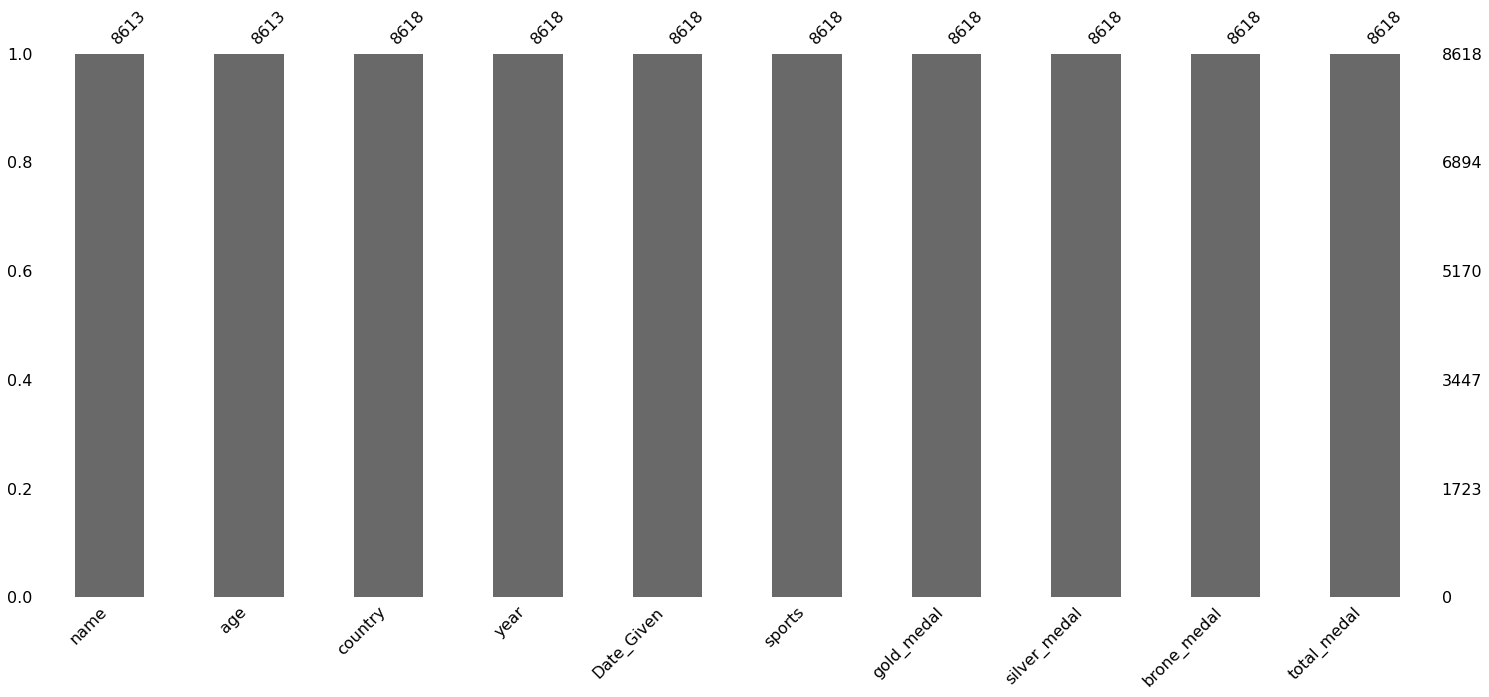

In [13]:
msno.bar(olympix)     # here we can see missing data in graphical terms.
                      # name and age.

In [14]:
# so here i have converted into Nan all the missing rows with the help of regex.

import re    # here importing library

for i in olympix.columns:
    olympix[i][olympix[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# in the above code i have converted missing or blank values into NaN. 
# here dropping all the rows that don't have the values or name or contain nan values also.
# the purpose of deleting those rows is that doesn't contain or contain less information.
# that's why i removed that rows from the dataFrame.

# using dropna function to remove all nan rows.
olympix = olympix.dropna()
print(olympix)

                      name   age        country  year  Date_Given      sports  \
0           Michael Phelps  23.0  United States  2008   8/24/2008    Swimming   
1           Michael Phelps  19.0  United States  2004   8/29/2004    Swimming   
2           Michael Phelps  27.0  United States  2012  08-12-2012    Swimming   
3         Natalie Coughlin  25.0  United States  2008   8/24/2008    Swimming   
4            Aleksey Nemov  24.0         Russia  2000  10-01-2000  Gymnastics   
...                    ...   ...            ...   ...         ...         ...   
8613      Olena Sadovnycha  32.0        Ukraine  2000  10-01-2000     Archery   
8614      Kateryna Serdiuk  17.0        Ukraine  2000  10-01-2000     Archery   
8615      Wietse van Alten  21.0    Netherlands  2000  10-01-2000     Archery   
8616  Sandra Wagner-Sachse  31.0        Germany  2000  10-01-2000     Archery   
8617             Rod White  23.0  United States  2000  10-01-2000     Archery   

      gold_medal  silver_me

In [16]:
olympix.isnull().sum()   # checking all null values.
                         # so here is no null values.

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

## Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps

In [17]:
# checking all duplicated values from the data.

olympix.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8613    False
8614    False
8615    False
8616    False
8617    False
Length: 8613, dtype: bool

In [18]:
olympix.duplicated().sum()     # duplicated value is zero.

0

In [19]:
olympix['name'].duplicated().sum()   # checking duplicated name is 1658.

1658

In [20]:
olympix = olympix.drop_duplicates()    # droping duplicated values.

## Please remove special characters from the name column.

In [21]:
# importing string
import string
# calling all ascii letters and string
alphabet = string.ascii_letters+string.punctuation

In [22]:
# removing all the special characters from the dataset.

olympix = olympix.replace('\*a-zA-Z !@#$%_+-=|:<>,.()[]{}',regex=True)

In [23]:
# so, here i am changing dtype of the column.

olympix['sports'] = olympix['sports'].astype('category')
olympix['age'] = olympix['age'].astype('int')

## Perform data visualization techniques to appropriate columns and explain them. 

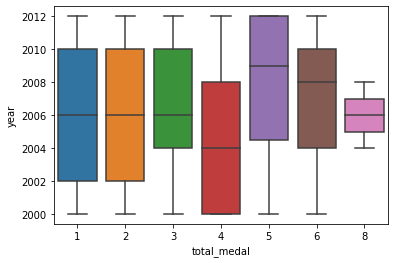

In [25]:
# here i am comparing year with total_medal.
# so, we can see that the upper whisker of 1,2,3 and 6 is something same. but in total_medal there is no outliers.
# the highest medal which i am taking haere "8" is won in between 2005 to 2007.
# so, we can see the year with comparing total_medal.

sns.boxplot(x='total_medal',y='year',data=olympix)

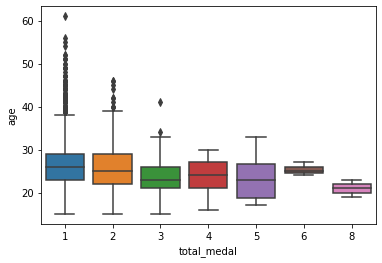

In [26]:
# here i am comparing total_medal with age.
# so the highest oulier is in "1" total_medal. ouliers is above 60.
# we can see the highest medal which is 8 won age group is 20 to 24.

sns.boxplot(x='total_medal',y='age',data=olympix)

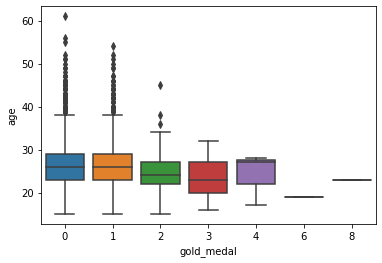

In [27]:
# here i am comparing gold_medal with age column.
# the highest outlier is in 0.
# so, we can see which age group have won the medal.
# the highest medal won age group is 25. 

sns.boxplot(x='gold_medal',y='age',data=olympix)

## Please check if the age dataset is skewed or symmetric. Based on results perform transformation.

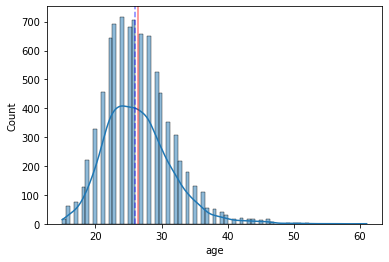

In [28]:
# here i am checking skewness in age column.
# age attribute is skewed.
# it is positively skewed or moving toward the right.
# the mean and median line is cllose to each other.
# and the outliers are high here.

sns.histplot(data=olympix['age'],kde=True)
plt.axvline(x=olympix.age.mean(),c="red", alpha=0.5, label="mean")
plt.axvline(x=olympix.age.median(),c="blue", alpha=0.5, ls="--", label="median")

## Please perform appropriate numerical measures on each column and report them accordingly.

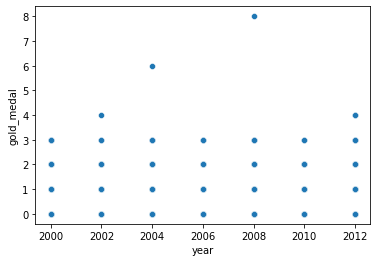

In [40]:
# here i am comparing year with gold_medal.
# using scatterplot.
# according to me, the highest oulier is in 2008. so, i say it is best year.
# the mostly won medal is 3 in every year. but some won 4 medal in the year 2002 and 2012.

sns.scatterplot(x='year',y='gold_medal',data=olympix)

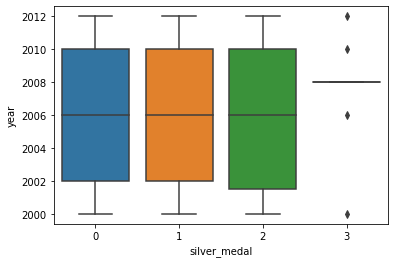

In [56]:
# here i am comparing year with silver_medal.
# from 2002 to 2010 some country have won medal 0(mean not), 1 and 2 and 3 also
# but in 3 (silver_medal) most of the country have not won it. so, there is 4 outliers. 

sns.boxplot(x='silver_medal',y='year',data=olympix)

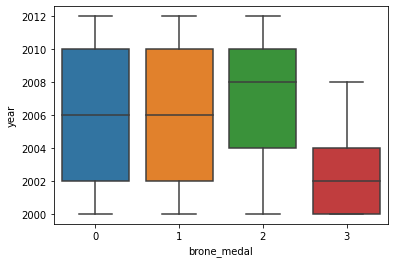

In [57]:
# here i am comparing year with brone_medal. here i am using boxplot plot
# in the brone_medal 0,1 is same. but 2(brone_medal) is from 2004 to 2010 and we can see below skewness.
# but in 3(brone_medal) the lower whisker is not there.

sns.boxplot(x='brone_medal',y='year',data=olympix)

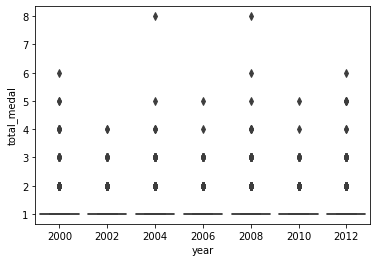

In [64]:
# here i am checking total_medal won in the year.
# according to me boxplot is best to understand outliers and all.
# in 2004 and 2008 is the year the oulier is high which is 8(total_medal). and there is huge outliers.
# the less ouliers is in 2002.

sns.boxplot(x='year',y='total_medal',data=olympix)

## Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

#### top 10 countries with the gold medal

In [86]:
top_gold = olympix.groupby("country").agg({"gold_medal": np.sum})     # using groupby function on country.
                                                                      # finding agg sum.

In [87]:
top_gold.nlargest(10,"gold_medal")     # finding 10 largest in gold_medal.

,gold_medal
country,
United States,552
China,234
Russia,234
Germany,223
Canada,168
Australia,163
Great Britain,124
South Korea,110
France,108


#### top 10 countries with the silver medal

In [90]:
top_silver = olympix.groupby("country").agg({"silver_medal": np.sum})   # using groupby function on country.
                                                                        # adding silver_medal of each country.

In [91]:
top_silver.nlargest(10,"silver_medal")              # finding 10 largest in silver_medal.

,silver_medal
country,
United States,440
Australia,226
Russia,221
Germany,183
China,156
Netherlands,135
Spain,116
Japan,112
France,107


#### top 10 countries with the bronze medal.

In [94]:
top_bronze = olympix.groupby("country").agg({"brone_medal": np.sum})      # using groupby function on country.
                                                                          # adding brone_medal of each country.

In [95]:
top_bronze.nlargest(10,"brone_medal")                 # finding 10 largest in brone_medal.

,brone_medal
country,
United States,320
Russia,313
Germany,223
Australia,220
Italy,142
China,140
Japan,113
South Korea,105
Canada,104


#### top 10 countries with the total medal.

In [99]:
top_total = olympix.groupby("country").agg({"total_medal": np.sum})      # using groupby function on country.
                                                                         # using sum on total_medal of each country.

In [100]:
top_total.nlargest(10,"total_medal")                 # finding 10 largest in total_medal.

,total_medal
country,
United States,1312
Russia,768
Germany,629
Australia,609
China,530
Canada,370
Italy,331
Great Britain,322
France,318


# Conversion of pandas data frame into PySpark dataframe

In [101]:
pip install pyspark   # installing pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 48.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=1d4b92f105869034322635a7c6b00e4574eb2071713ab3e73c999de6ad59e7d2
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [102]:
# taking columns of the olympix dataframe.

pandas_df = olympix[["name","age","country","year","Date_Given","sports","gold_medal","silver_medal","brone_medal","total_medal"]].copy()
pandas_df.head(2)

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19,United States,2004,8/29/2004,Swimming,6,0,2,8


In [103]:
pandas_df.shape           # checking no. of rows and columns.

(8613, 10)

In [104]:
# importing libraries and setting up the app name.

from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("secondary")
sc = SparkContext(conf=conf)

In [105]:
# importing spark library.

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate().getOrCreate()
spark = SparkSession(sc)


In [109]:
# creating dataframe of pyspark or converting from pandas dataframe to pyspark.

spark_df_from_pandas = spark.createDataFrame(pandas_df)
spark_df_from_pandas.show(5)

+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|  Michael Phelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|Natalie Coughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|   Aleksey Nemov| 24|       Russia|2000|10-01-2000|Gymnastics|         2|           1|          3|          6|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----

In [110]:
type(spark_df_from_pandas)      # checking the type it is PysparkSql dataframe.

pyspark.sql.dataframe.DataFrame

In [112]:
spark_df_from_pandas.printSchema()        # checking scemas of the dataframe.
                                          # checking dtype.

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: long (nullable = true)
 |-- silver_medal: long (nullable = true)
 |-- brone_medal: long (nullable = true)
 |-- total_medal: long (nullable = true)



### Write PySpark code to read olympix_data.csv file

In [113]:
# loading dataset.

df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")

In [114]:
df.show(5)      # checking head of the table.

+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|  Michael Phelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|Natalie Coughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|   Aleksey Nemov| 24|       Russia|2000|10-01-2000|Gymnastics|         2|           1|          3|          6|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----

### Write PySpark code to print the Olympic Sports/games in the dataset.

In [115]:
df.select("sports").distinct().show()     # here i have printed the sports game
                                          # but i have done with distinct to check all the games.

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



### Write PySpark code to plot the total number of medals in  each Olympic Sport/game

In [117]:
from itertools import count                           # count library
from pyspark.sql.functions import countDistinct       # countdistinct library
from pyspark.sql import functions as F                # calling function F or importing.


df.groupby("sports").agg(F.count("total_medal")).show()       # here i have found sports and count of evry total_medal it made.

+--------------------+------------------+
|              sports|count(total_medal)|
+--------------------+------------------+
|          Gymnastics|               194|
|              Tennis|                71|
|              Boxing|               188|
|Short-Track Speed...|                96|
|          Ice Hockey|               384|
|              Rowing|               567|
|                Judo|               224|
|            Softball|               134|
|             Sailing|               210|
|            Swimming|               487|
|       Alpine Skiing|                61|
|          Basketball|               287|
|            Handball|               351|
| Rhythmic Gymnastics|                84|
|            Biathlon|                94|
|           Triathlon|                24|
|           Badminton|                91|
|           Athletics|               687|
|      Figure Skating|                54|
|    Beach Volleyball|                48|
+--------------------+------------

### Sort the result based on the total number of medals.

In [118]:
df.sort("total_medal").show()           # here i have used sorting function.
                                        # it is in ascending in order.

+--------------------+---+-------------+----+----------+---------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|   sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+---------+----------+------------+-----------+-----------+
|    Artur Aleksanyan| 20|      Armenia|2012|08-12-2012|Wrestling|         0|           0|          1|          1|
|Aleksandras Kazak...| 26|    Lithuania|2012|08-12-2012|Wrestling|         0|           0|          1|          1|
|  Valeriy Andriitsev| 25|      Ukraine|2012|08-12-2012|Wrestling|         0|           1|          0|          1|
|     Rövs?n Bayramov| 25|   Azerbaijan|2012|08-12-2012|Wrestling|         0|           1|          0|          1|
|    Jordan Burroughs| 24|United States|2012|08-12-2012|Wrestling|         1|           0|          0|          1|
|       Clarissa Chun| 30|United States|2012|08-12-2012|Wrestling|         0|   

### Find the total number of medals won by each country in swimming.

In [119]:
df1 = df.filter(df.sports == "Swimming")                      # here i am using filteration and selecting "swimming".

In [120]:
df1.groupby("country").agg(F.count("total_medal")).show()   # using groupby function in country and finding count of total medal.

+-------------+------------------+
|      country|count(total_medal)|
+-------------+------------------+
|       Russia|                19|
|       Sweden|                 7|
|      Germany|                27|
|       France|                26|
|     Slovakia|                 1|
|    Argentina|                 1|
|Great Britain|                 9|
|United States|               145|
|        China|                29|
|      Belarus|                 1|
|      Croatia|                 1|
|        Italy|                13|
|    Lithuania|                 1|
|       Norway|                 2|
|        Spain|                 2|
|      Denmark|                 1|
|      Ukraine|                 4|
|  South Korea|                 2|
|     Zimbabwe|                 2|
|      Tunisia|                 2|
+-------------+------------------+
only showing top 20 rows



### Find the total number of medals won by each country in Skeleton.

In [121]:
df2 = df.filter(df.sports == "Skeleton")                # here i am using filteration and selecting "Skeleton".

In [122]:
# using groupby function in country and finding count of total medal in skeleton.

df2.groupby("country").agg(F.count("total_medal")).show()   

+-------------+------------------+
|      country|count(total_medal)|
+-------------+------------------+
|       Russia|                 1|
|      Germany|                 2|
|Great Britain|                 3|
|United States|                 3|
|  Switzerland|                 3|
|       Latvia|                 1|
|       Canada|                 4|
|      Austria|                 1|
+-------------+------------------+



### Find the number of medals that the US won yearly.

In [126]:
# so, here i am selecting country, year and total medal
# using where and groupby clause.
# and finding the count yearly.

us_df = df.select("country","year","total_medal").where(df.country == "United States").groupby("country","year").agg(F.count("total_medal")).show()

+-------------+----+------------------+
|      country|year|count(total_medal)|
+-------------+----+------------------+
|United States|2012|               206|
|United States|2002|                80|
|United States|2000|               214|
|United States|2008|               263|
|United States|2010|                84|
|United States|2006|                46|
|United States|2004|               216|
+-------------+----+------------------+



### Find the total number of medals won by each country.

In [127]:
# so, here i am finding total number of medal won by each country.

df.groupby("country").agg(F.count("total_medal")).show()

+--------------+------------------+
|       country|count(total_medal)|
+--------------+------------------+
|        Russia|               706|
|      Paraguay|                17|
|Chinese Taipei|                20|
|        Sweden|               167|
|       Eritrea|                 1|
|     Singapore|                 6|
|      Malaysia|                 3|
|        Turkey|                27|
|       Germany|               552|
|   Afghanistan|                 2|
|         Sudan|                 1|
|        France|               287|
|        Greece|                59|
|     Sri Lanka|                 1|
|       Algeria|                 8|
|          Togo|                 1|
|      Slovakia|                33|
|     Argentina|               141|
|       Belgium|                18|
| Great Britain|               296|
+--------------+------------------+
only showing top 20 rows



### Who was the oldest athlete in the olympics? 

In [128]:
# here i am selecting name, year, date_given with age.
# and finding oldest athelete. 

df.select("name","year","Date_Given","age").filter(df.age>=60).show()

+----------+----+----------+---+
|      name|year|Date_Given|age|
+----------+----+----------+---+
|Ian Millar|2008| 8/24/2008| 61|
+----------+----+----------+---+



### Which country was he/she from?

In [129]:
# so, here i have count person whether he/she.
# i have applied groupby on country and count the name.

df.select("name","country").groupby("country").agg(F.count("name")).show()

+--------------+-----------+
|       country|count(name)|
+--------------+-----------+
|        Russia|        706|
|      Paraguay|         17|
|Chinese Taipei|         20|
|        Sweden|        167|
|       Eritrea|          1|
|     Singapore|          6|
|      Malaysia|          3|
|        Turkey|         27|
|       Germany|        552|
|   Afghanistan|          2|
|         Sudan|          1|
|        France|        287|
|        Greece|         59|
|     Sri Lanka|          1|
|       Algeria|          8|
|          Togo|          1|
|      Slovakia|         33|
|     Argentina|        139|
|       Belgium|         18|
| Great Britain|        296|
+--------------+-----------+
only showing top 20 rows

